-----------------------------------------------CLASSIFICATION PROBLEM---------------------------------------------

This is a binary classification problem where we need to predict whether or not to approve a loan based on the past information of the person.

Importing Important Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [87]:
data=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [88]:
df=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [89]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
#info about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [91]:
#Shape of the dataset
data.shape

(614, 13)

There are 614 rows and 13 columns in the Dataset.

In [92]:
#Description about the Dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here we can observe that the maximum value of ApplicantIncome and CoapplicantIncome is much higher than the 75%of the data of ApplicantIncome and CoapplicantIncome respectively.

In [93]:
#Datatypes of the features
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Continous variables are:  CoapplicantIncome, ApplicantIncome,  LoanAmount,  Loan_Amount_Term,  Credit_History.
Categorical Variables are:   Loan_ID, Gender,  Married,  Dependents,  Eduaction,  Self_Employed,  Property_area,  Loan_Status.

In [94]:
#Checking for missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the following features:-             'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'.

There are 22 missing values in the LoanAmount variable so we fill the missing values by the mean of all values in that variable.

In [95]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

There are 50 missing values in the credit History. we fill those missing values by the median of Credit History.

In [96]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [97]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

We drop all other missing values in the variables.

In [98]:
df.dropna(inplace=True)

In [99]:
df.shape

(480, 13)

Now,the new shape of the dataset is (542,13).

**UNIVARIATE ANALYSIS**

In [100]:
df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

Out of 542, there are 444 males and 98 females applying for loan.

In [101]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

We observe there are more number of married people applying for loan than unmarried.

In [102]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

More than half of the total applying for loan are graduates.

In [103]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

People who are self employed tend not to apply for loan.

In [104]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

There is no much difference among the locality of people applying for loan. Almost people from all areas apply for a loan.

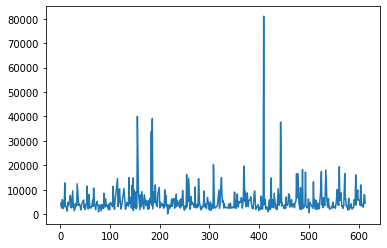

In [170]:
plt.plot(df['ApplicantIncome'])

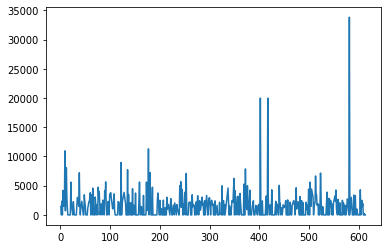

In [171]:
plt.plot(df['CoapplicantIncome'])

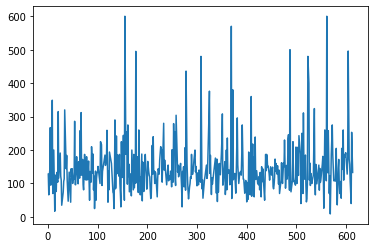

In [172]:
plt.plot(df['LoanAmount'])

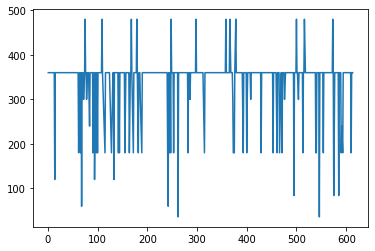

In [173]:
plt.plot(df['Loan_Amount_Term'])

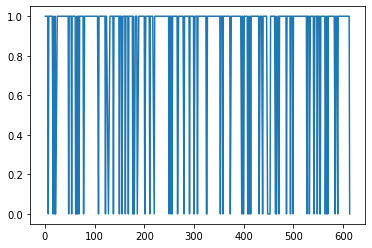

In [174]:
plt.plot(df['Credit_History'])

**BIVARIATE ANALYSIS**

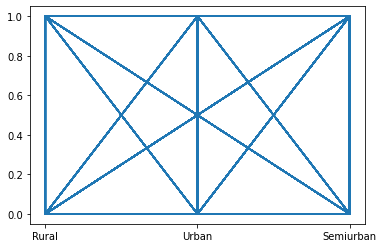

In [176]:
plt.plot('Property_Area','Loan_Status',data=df)

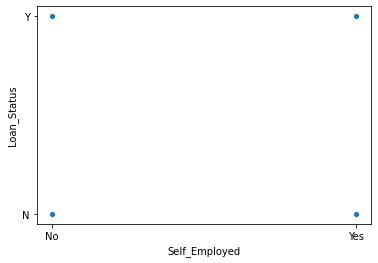

In [111]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=df)

In [112]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


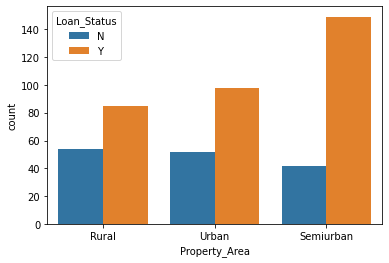

In [113]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

Out of all semiurban people who apply for a loan more than half of them got a loan.
So this seems to a useful feature.

In [114]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


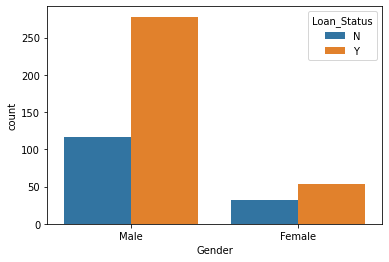

In [115]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

Males have high chances of getting a loan.

In [116]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


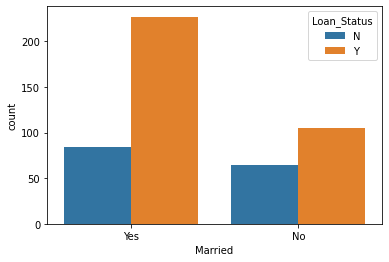

In [117]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

Out of all married people who applied for a loan,maximum of them get their loan approved.

In [118]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


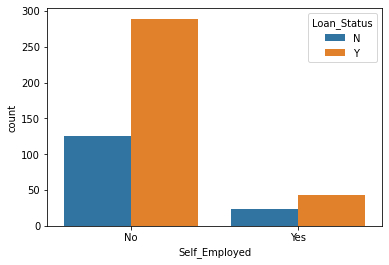

In [119]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

In [120]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


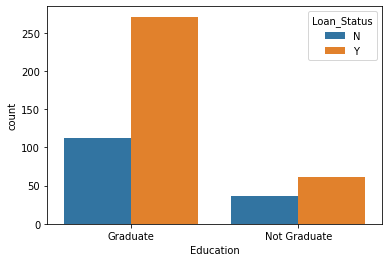

In [121]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

Half of the graduates who applied for loan got their loan approved.

Converting dependent categorical variable to continous variable.

In [122]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

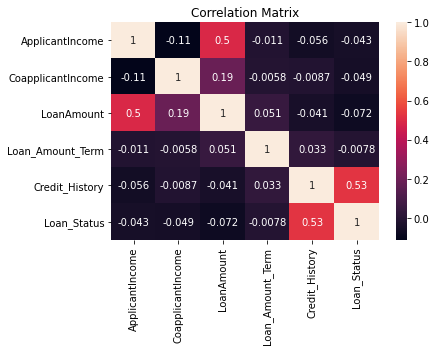

In [123]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

As we can observe from the above correlation matrix that the dependent variable loan_status is dependent only on Credit_History.
So we keep this independent variable and discard all other variables which are not related with the loan_status.

In [124]:
df2=df.drop(labels=['ApplicantIncome'],axis=1)

In [125]:
df2=df2.drop(labels=['CoapplicantIncome'],axis=1)

In [126]:
df2=df2.drop(labels=['LoanAmount'],axis=1)

In [127]:
df2=df2.drop(labels=['Loan_Amount_Term'],axis=1)


In [128]:
df2=df2.drop(labels=['Loan_ID'],axis=1)

In [129]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,1.0,Urban,1


Changing categorical variables to continous variables.

In [130]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [131]:
df2['Property_Area']=le.fit_transform(df2['Property_Area'])

In [132]:
df2['Dependents']=le.fit_transform(df2['Dependents'])

In [133]:
df2=pd.get_dummies(df2)

In [134]:
df2.dtypes

Dependents                  int64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
dtype: object

Now we can see each and every variable is changed to continous variable.

In [135]:
df2=df2.drop(labels=['Gender_Female'],axis=1)

In [136]:
df2=df2.drop(labels=['Married_No'],axis=1)

In [137]:
df2=df2.drop(labels=['Education_Not Graduate'],axis=1)

In [138]:
df2=df2.drop(labels=['Self_Employed_No'],axis=1)

In [139]:
df2.head()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
1,1,1.0,0,0,1,1,1,0
2,0,1.0,2,1,1,1,1,1
3,0,1.0,2,1,1,1,0,0
4,0,1.0,2,1,1,0,1,0
5,2,1.0,2,1,1,1,1,1


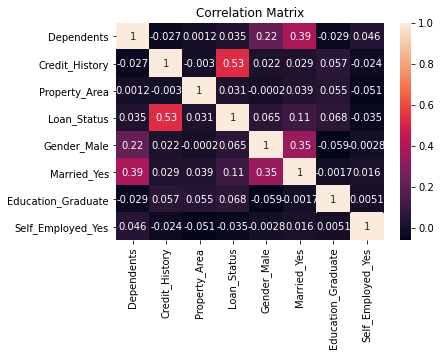

In [140]:
plt.title('Correlation Matrix')
sns.heatmap(df2.corr(),annot=True)

Loan status is least correlated with self_employed_yes,education_graduate,dependents.

In [141]:
df2=df2.drop('Self_Employed_Yes',1)

In [142]:
df2=df2.drop('Dependents',1)

In [143]:
df2=df2.drop('Education_Graduate',1)

In [144]:
X=df2.drop('Loan_Status',1)

In [145]:
Y=df2['Loan_Status']

Splitting train and test dataset.

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [148]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (384, 4)
Shape of X_test is:  (96, 4)
Shape of Y_train is:  (384,)
Shape of y_test is:  (96,)


---**LOGISTIC REGRESSION**---

In [149]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [150]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
log.score(x_train,y_train)

0.8020833333333334

In [152]:
#Predicting test dataset
pred=log.predict(x_test)

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(y_test,pred)

0.8333333333333334

This seems to be a good accuracy score.

In [155]:
from sklearn import metrics

Confusion matrix

In [156]:
metrics.confusion_matrix(y_test,pred)

array([[12, 14],
       [ 2, 68]])

From confusion matrix we can observe that

* True positive value= 23
* True negative value=1
* False negative=16
* False positive=69

In [157]:
metrics.recall_score(y_test,pred)

0.9714285714285714

In [158]:
metrics.precision_score(y_test,pred)

0.8292682926829268

In [159]:
metrics.f1_score(y_test,pred)

0.8947368421052632

In [160]:
data={'y_test':y_test,'pred':pred}
pd.DataFrame(data=data)

,y_test,pred
40,0,1
339,1,1
204,1,1
431,0,0
315,1,1
...,...,...
144,1,1
217,1,1
70,1,1
456,1,1


-----**DECISION TREE**------

In [161]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [162]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
clf.score(x_train,y_train)

0.8072916666666666

In [164]:
pred1=clf.predict(x_test)

In [165]:
accuracy_score(y_test,pred1)

0.78125

In [166]:
metrics.confusion_matrix(y_test,pred1)

array([[13, 13],
       [ 8, 62]])

From confusion matrix we can observe that
* True positive value= 23
* True negative value=1
* False negative=16
* False positive=69

In [167]:
metrics.f1_score(y_test,pred1)

0.8551724137931035

In [168]:
metrics.recall_score(y_test,pred1)

0.8857142857142857

In [169]:
metrics.precision_score(y_test,pred1)

0.8266666666666667